In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

Ниже отражены решения только тех задач, где была математика. Штуки типа "вспомни определение и напиши правильный ответ" не вошли.

# Ряд

Есть ряд с числами, принимающими значения от 1 до 10 (только целые). Среднее равно 5.45, медиана равна 1. Может ли быть такое? Что скажешь о распределении, описывающем этот ряд?

__Решение:__ Главное для нас - не воссоздать ряд в точности, а лишь прикинуть его возможную форму. Действительно, медиана, равная $1$, гарантирует, что если ряд отсортирован, то чуть больше половины его элементов - единицы.

Возьмем ряд $[1,1,10]$, и будем добавлять в его начало единицы, а в конец - десятки, и посмотрим, что будет происходить:

In [3]:
means = []
meds = []
a = [1,1,10]
eps = 1e-3 
for i in range(400):
    a.insert(0, 1)
    a.insert(len(a), 10)
    means.append(np.mean(a))
    meds.append(np.median(a))
    if abs(np.mean(a)-5.45) < eps:
        print('Ряд длиной %i очень похож на искомый!' % (i+1))

Ряд длиной 43 очень похож на искомый!
Ряд длиной 44 очень похож на искомый!


Видим, что медиана рядя действительно не меняется, а среднее проходит через $5.45$, следовательно, можно найти такой набор членов, который гарантирует выполнение наших условий:

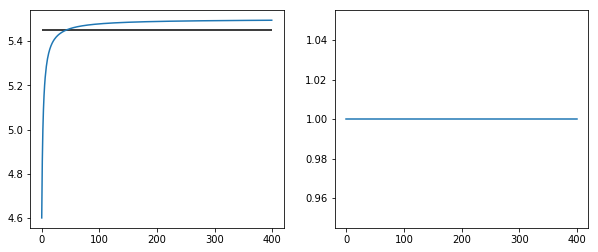

In [4]:
f, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax.plot(means);
ax.hlines(y=5.45, xmin=0, xmax=400);
ax2.plot(meds);

Распределение ряда будет очень похожим на бимодальное (или мультимодальное):

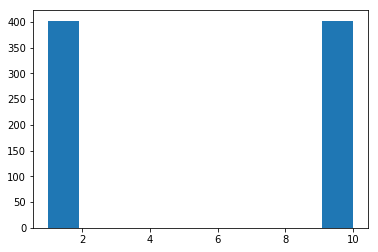

In [5]:
plt.hist(a);

# Факториал 

Сколько нулей на конце числа $N!$ ? Как ты посчитал?

__Решение:__ конечно, вычислять факториал данного $N!$ - плохо, и не то решение, которое мы ожидали. Следующая распространенная ошибка - неправильный подсчет пятерок. Убеждаемся в том, что целочисленное деление на пять - плохо:

In [6]:
from math import factorial

In [7]:
def num_zeros(x):
    cnt = 0
    while x % 10 == 0:
        cnt += 1
        x //= 10
    return cnt

In [8]:
def num_fives(x):
    return x // 5

In [9]:
N = 36
fives = [num_fives(i+1) for i in range(N)]
zeros = [num_zeros(factorial(i+1)) for i in range(N)]

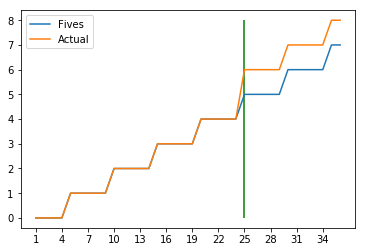

In [10]:
plt.plot(range(1,37), fives, label='Fives');
plt.plot(range(1,37), zeros, label='Actual');
plt.xticks(range(1, 37, 3));
plt.vlines(25, 0, 8, color='g');
plt.legend();

Для первых 36 чисел в таком подходе уже есть расхождение с правдой, и это можно видеть на графике выше. Откуда такое поведение?

Конечно, от того, что при разложении на простые множители 25 дает не одну пятерку, а уже 2. То же - с числами 125, 625 и так далее, - словом, со всеми степенями пятерки. Сколько в $N!$ пятерок? Те самые $\left[\frac{N}{5}\right]$. Сколько 25? Ровно $\left[\frac{N}{5^2}\right]$.

Это можно легко представить в виде суммы:
$$ \sum_{i=1}^{\infty}\left[\frac{N}{5^i}\right] $$

Но, конечно, она не должна быть до бесконечности. Если $5^i$ уже больше $N$, надо остановиться, а значит верхняя граница суммы может быть уточнена: 
$$ 5^i < N $$
$$ \log_5{5^i} < \log_5{N} $$
$$ i < \log_5{N} $$

Финальный ответ: $$ \sum_{i=1}^{\log_5{N}}\left[\frac{N}{5^i}\right] $$

# Дартс



Однажды в Surf, в очередной раз играя в дартс, мы подумали, что дротики слишком часто попадают в стену, и решили сделать доску для дартс квадратной (сторона квадрата равна диаметру круга). Мы также называем бросок "успешным", если дротик приземлился ближе к центру, чем к любой из сторон квадрата (или краю нашей бывшей круглой доски). Как изменилась вероятность бросить дротик успешно, если считать, что мы попадаем только в доску и никогда не попадаем в стену?

__Решение:__ Начнем с красивых иллюстраций. Промоделируем ситуацию:

In [11]:
k = 100_000
angles = 360 * np.random.rand(k)
rads = np.random.rand(k)

In [12]:
deg_to_grad = lambda x: x / 360.0 * 2 * np.pi

In [13]:
cir_x, cir_y = zip(*[(r*np.cos(deg_to_grad(a)), r*np.sin(deg_to_grad(a))) for a, r in zip(angles, rads)]) 

In [14]:
sq_x = 2*np.random.rand(k) - 1
sq_y = 2*np.random.rand(k) - 1

Броски в нашу прошлую и нынешнюю доску:

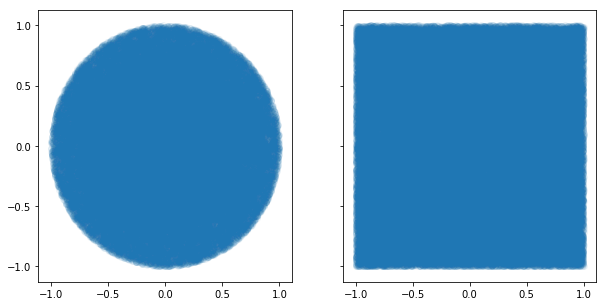

In [15]:
plt.rcParams['figure.figsize'] = 10, 5

f,(ax,ax2) = plt.subplots(1, 2, sharey=True)
ax.scatter(cir_x, cir_y, alpha=0.05);
ax2.scatter(sq_x, sq_y, alpha=0.05);

Удачный бросок в старую круглую доску - конечно, тоже круг.

In [16]:
lucky_cir_x, lucky_cir_y = zip(*[(x, y) for x,y in zip(cir_x, cir_y) if np.sqrt(x**2 + y**2) < 0.5])
unlucky_cir_x, unlucky_cir_y = zip(*[(x, y) for x,y in zip(cir_x, cir_y) if np.sqrt(x**2 + y**2) >= 0.5])

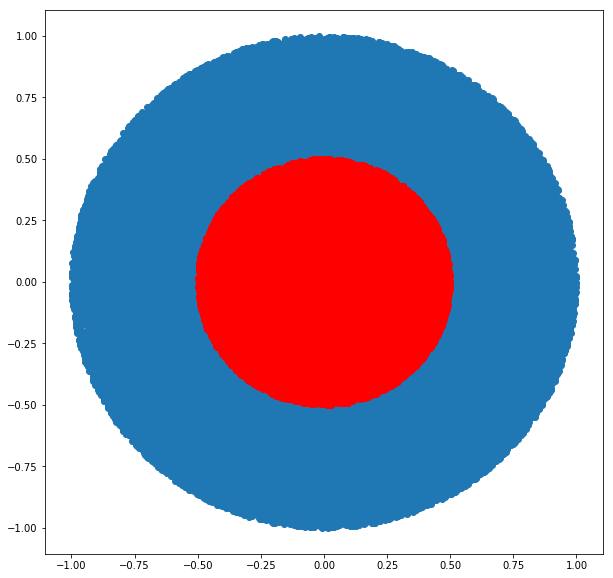

In [17]:
plt.rcParams['figure.figsize'] = 10, 10

plt.scatter(unlucky_cir_x, unlucky_cir_y);
plt.scatter(lucky_cir_x, lucky_cir_y, c='r');

С этой частью задания вы справились без проблем: площадь маленького круга составляет четверть от площади большого.

$P(lucky\:|\:circle) = 1/4$

---

А вот с квадратом все намного хитрее, и, к сожалению, __никто__ не решил эту часть задачи правильно.

Смотрим, где были ошибки?

In [18]:
def closer_to_center(x, y):
    cent = np.sqrt(x**2 + y**2)
    side = min(abs(-1-x), abs(-1-y), abs(1-x), abs(1-y))
    return cent < side

In [19]:
lucky_sq_x, lucky_sq_y = zip(*[(x, y) for x,y in zip(sq_x, sq_y) if closer_to_center(x,y)])
unlucky_sq_x, unlucky_sq_y = zip(*[(x, y) for x,y in zip(sq_x, sq_y) if not closer_to_center(x,y)])

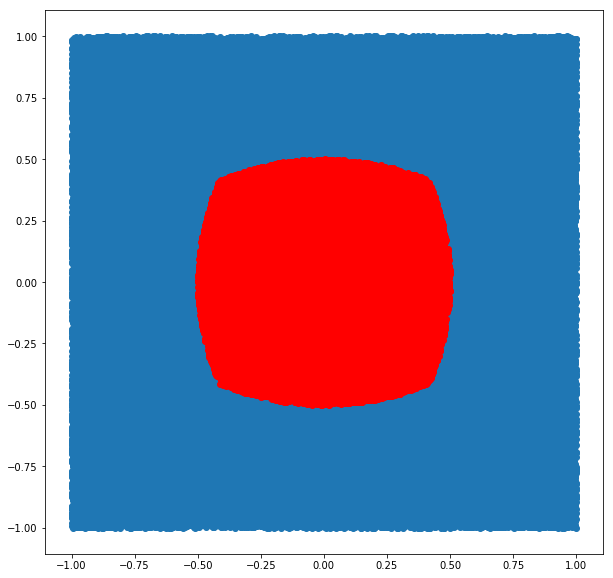

In [20]:
plt.rcParams['figure.figsize'] = 10, 10

plt.scatter(unlucky_sq_x, unlucky_sq_y);
plt.scatter(lucky_sq_x, lucky_sq_y, c='r');

Да. Вот такая область получилось просто от ряда экспериментальных бросков. Это ~~не самолет и не облако~~ не круг и не квадрат.

Предположим, что углы квадрата расположены в точках $(\pm1; \pm1)$. Точка $(x;y)$ в квадрате ближе к центру, чем к верхней грани, если выполняется условие $\sqrt{x^2 + y^2} \le 1-y$, что эквивалентно выражению $x^2 + y^2 \le (1-y^2)$ и $y \le \frac{(1-x^2)}{2}$. Это описывает регион под параболой:

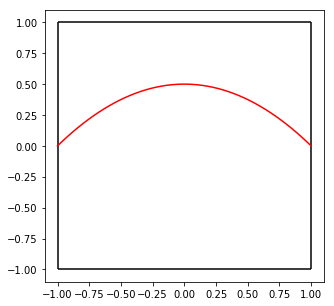

In [21]:
plt.rcParams['figure.figsize'] = 5, 5

plt.figure();
plt.hlines(1, -1, 1);
plt.hlines(-1, -1, 1);
plt.vlines(1, -1, 1);
plt.vlines(-1, -1, 1);

xs = np.linspace(-1, 1)
ys_t = [(1-x**2)/2 for x in xs]
plt.plot(xs, ys_t, c='red');

Аналогичная ситуация возникает при рассмотрении близости к центру и одной из оставшихся сторон:

<img src="luckyShots.png" width="20%">

Введем обозначение: регион $A$ ограничен тремя неравенствами: $y \ge x$, $x \ge 0$ и $y \le \frac{1-x^2}{2}$. На рисунке ниже он обозначен зеленым:

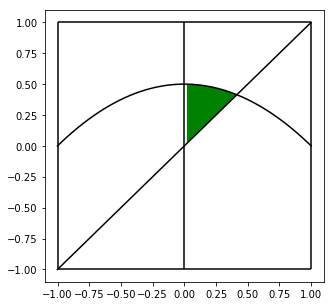

In [22]:
fig, ax = plt.subplots()
plt.hlines(1, -1, 1);
plt.hlines(-1, -1, 1);
plt.vlines(1, -1, 1);
plt.vlines(-1, -1, 1);
plt.vlines(0, -1, 1);

xs = np.linspace(-1, 1)
ys_t = [(1-x**2)/2 for x in xs]
ys_d = [x for x in xs]

plt.plot(xs, ys_d, c='black');
plt.plot(xs, ys_t, c='black');

ax.fill_between(xs, ys_t, ys_d, where=(xs>=0)&(xs<np.sqrt(2)-1), facecolor='green', interpolate=True);

Из-за наличия множества осевых симметрий чтобы найти точки пересечений, достаточно решить систему из двух уравнений: $ y = x $ и $ y = \frac{(1-x^2)}{2} $. Эти кривые пересекаются в $(x;y) = (\sqrt{2} - 1; \sqrt{2} - 1)$. 

Пользуясь этим, искомую площадь можно вычислить как $$ P(lucky\:|\: square) = \frac{8Area(A)}{Area(board)} = 2Area(A) = 2 \int_0^{\sqrt{2}-1}\left(\frac{1-x^2}{2} - x\right)dx = \frac{4\sqrt{2} - 5}{3} = 0.219...$$

Площадь, конечно, изменилась, уменьшившись на примерно $3\%$, или $$\frac{1}{4} - \frac{4*\sqrt{2} - 5}{3}$$Это и есть ответ на задачу.

# Минимакс

$x, y$ - независимые случайные величины, распределенные на отрезке $[0; 1]$ равновероятно (равномерно). 

Чему равна вероятность того, что $max(x; y) - min(x; y) < 1/3$?

In [23]:
k = 50_000
x = [np.random.rand() for _ in range(k)]
y = [np.random.rand() for _ in range(k)]

In [24]:
diffs = [max(a,b)-min(a,b) for a,b in zip(x,y)]

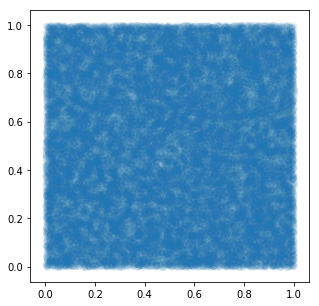

In [25]:
plt.scatter(x, y, alpha=0.05);

In [26]:
lt = [(a,b) for a,b in zip(x,y) if max(a,b)-min(a,b) < 1/3]
gt = [(a,b) for a,b in zip(x,y) if max(a,b)-min(a,b) >= 1/3]

In [27]:
lt_x, lt_y = zip(*lt)
gt_x, gt_y = zip(*gt)

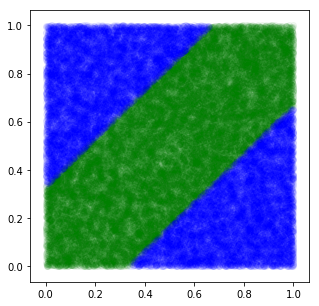

In [28]:
plt.scatter(lt_x, lt_y, alpha=0.05, c='g');
plt.scatter(gt_x, gt_y, alpha=0.05, c='b');

Пользуясь геометрическим определением вероятности, легко видеть, что искомая вероятность - отношение площади зеленой фигуры к площади всего квадрата. 

Площадь синего треугольника $S_{tr} = \frac{1}{2}\cdot\frac{2}{3}\cdot\frac{2}{3} = \frac{2}{9}$.

Площадь зеленой фигуры $S_{gr} = 1 - 2\cdot\frac{2}{9} = \frac{5}{9}$.

# Черно-белый кубик

Черный кубик снаружи покрасили белой краской и разрезали, как Кубик Рубика, на 27 маленьких кубиков. После этого из всех маленьких снова сложили один большой. С какой вероятностью все грани кубика белые?

__Решение:__ задача на классическую комбинаторику. Будем рассматривать кубики разного вида. 

* Кубики с __одной__ белой гранью. Всего есть 6 позиций из 27, на которые они могут быть поставлены правильно - их "родные" места. Сначала возьмем именно эти 6 кубиков из 27; порядок кубиков не важен, а значит, есть $6!$ вариантов. Кроме того, каждый из них может быть повернут некоторым образом. Учитывая повороты, всего существует, опять же, 6 положений. Шанс того, что мы поставим первый кубик правильно, равняется $\frac{1}{27}\cdot\frac{1}{6}$, второй (после первого) - $\frac{1}{26}\cdot\frac{1}{6}$, и так далее. Так как правильное расположение этих шести кубиков должны выполняться одновременно, для кубиков с одной белой гранью вычислим вероятность: $$ \frac{6!}{6^6\cdot27^{\underline{22}}} = \frac{6!}{6^6\cdot27\cdot26\cdot25\cdot24\cdot23\cdot22} $$

* Кубики с __двумя__ белыми гранями. Всего их родных мест - 12 из 27. Каждый может быть в одном из возможных 12 положений. Руководствуясь той же логикой, вероятность расставить правильно такие кубики _после_ того, как мы расставили кубики с одной белой гранью, равняется $$ \frac{12!}{12^{12}\cdot21^{\underline{10}}} = \frac{12!}{12^{12}\cdot21\cdot10\cdot\ldots\cdot10} $$

* Кубики с __тремя__ белыми гранями. Всего их родных мест - 8 из 27. Каждый может быть в одном из возможных 8 положений. Руководствуясь той же логикой, вероятность расставить правильно такие кубики _после_ того, как мы расставили кубики с одной и двумя белой гранью, равняется $$ \frac{8!}{8^8\cdot9^{\underline{2}}} = \frac{8!}{8^8\cdot9\cdot8\cdot\ldots\cdot2} $$

* Единственный полностью черный кубик встает на свое место после расстановки всех предыдущих кубиков однозначно правильно, поэтому вероятность его поставить равна $1$.

Заметим также, что произведение убывающих факториалов $27^{\underline{22}}\cdot21^{\underline{10}}\cdot9^{\underline{2}}\cdot1$ равносильно $27!$.

Итоговая вероятность равна $$\frac{6!8!12!}{27!\cdot8^8\cdot12^{12}\cdot6^6}$$

В числах это эквивалентно $\frac{1}{5465062811999459151238583897240371200}$, или $1.82981\times10^{-37}$

# Монета и кубик

Как с помощью идеальной монеты моделировать 6-гранный кубик?

__Решение:__ Все достаточно просто: 3 броска кубика обеспечивают нас $2^3 = 8$ вариантами комбинаций орла и решки. Закодируем первые шесть соответвуюше граням кубика, а если же выпадут последние 2 варианта, то просто начнем процесс заново.

# Игра в карты

Двои игроков, А и В, играют в следующую игру. Берется колода из $2N$ карт, пронумерованных от 1 до $2N$. Она перемешивается, и каждому игроку достается N карт. Дальше ходят поочередно, начинает А. Он берет одну из своих карт и объявляет ее номер, прибавляя к общей сумме. Затем ходит B. Выигрывает тот игрок, после хода которого общая сумма станет делимой нацело на $2N+1$. Предполагая, что оба игрока играют оптимально, какова вероятность победы игрока А?

__Решение:__ Игрок $B$ выигрывает _всегда_. Своим ходом он может гарантировать, что $A$ не выиграет на следующем ходу: он держит в руке всегда на 1 карту больше, чем $A$, и каждая сыгранная карта игроком $A$ имеет свою карту-пару (и не более одной!) у $B$, которая приводит к поражению $B$. Но так как у $B$ на 1 карту больше, у $B$ всегда есть возможность сыграть безопасно.

Таким образом, игрок B выигрывает на последнем ходу (если не раньше), так как сумма всех чисел на всех картах составляет $n(2n + 1)$.

# Выбор паба

Саня и Женя, два друга-студента, любители пива, предпочитают проводить свободное от учебы время за кружкой пива в одном из пабов. Но каждый раз они спорят друг с другом, какой паб предпочесть — «Shemrock» или «ToDublin»? Один из них утверждает, что наиболее популярной у студентов является «Shemrock», в то время как второй верен «ToDublin». С целью положить конец спорам было решено опросить других студентов: какой из пабов они предпочитают. Друзьям удалось опросить __25__ человек, из которых __15__ предпочли «ToDublin», а __10__ — «Shemrock». Можно ли на основании полученных результатов утверждать, что один из пабов популярнее другого? Почему?

__Решение:__ Для решение задач подобного рода чаще всего используется биномиальный тест. Основу теста составляет формула Бернулли, определяющая вероятность того, что в $N$ независимых испытаниях, в каждом из которых вероятность появления события равна $p$, событие наступит не более $k$ раз:
$$ p(x \le k) = \sum_{i=0}^{x}\binom{N}{i}p^iq^{N-i} $$
, где $q=(1-p); \binom{N}{i} = \frac{N!}{i!(N-i)!}$

Всего имеем 25 независимых испытаний - результатов опроса. Вероятность выбора первого примем равной вероятности выбора второго: $p=q=0.5$.

С помощью формулы Бернулли вычисляется вероятность того, что в пользу
первого паба будет сделано не более 15 выборов из 25 (или вероятность того, что в пользу второго паба будет сделано не более 10 выборов).

Как известно, если вероятность случайного наступления какого-либо события ничтожно мала, но событие тем не менее имело место, то можно говорить
о нем как о неслучайном. В качестве границы между нашим отношением к событию как случайному или как к неслучайному выступает значение уровня значимости $\alpha$.

Таким образом, если событие имеет место (определенное число выборов в
пользу одного из пабов), а теоретическая вероятность случайного наступления
такого события ничтожна мала (меньше значения $\alpha$), то это будет говорить о неслучайности полученного результата.

После этих рассуждений приступим к проверке.
Выберем уровень значимости $\alpha = 0,05$ и сформулируем нулевую и альтернативную гипотезы.

* $H0$: Оба паба пользуются одинаковой популярностью.
* $H1$: Первый паб пользуется большей популярностью по сравнению со вторым.

В данном случае при проверке гипотезы используется односторонняя критическая область. Если бы нас интересовало не то, какой из пабов более популярен, а одинаковы ли они по популярности, альтернативная гипотеза выглядела бы следующим образом:

* $H1$: Популярность пабов различна.

В этом случае необходимо было бы использовать двустороннюю критическую
область.

На основании имеющихся данных можно приступать к вычислениям с использованием приведенной формулы. Подставим в нее все необходимые для
вычислений значения: $k=10, p=q=0.5, N=25$.

$$ p(x \le k) = \sum_{i=0}^{10} \binom{N}{i}0.5^i\cdot0.5^{25-i} = 0.212 $$

Поскольку $p=0.212$ больше значения $\alpha = 0.05$, у нас нет оснований
отвергнуть нулевую гипотезу. Оба паба пользуются одинаковой популярностью
у студентов, а различия в выборах в пользу одного и другого объясняются действием случайных факторов.

# Уравнение

Решите уравнение: $$[x^3]+[x^2]+[x] = \{x\}-1$$ В обозначениях $[x]$ - целая часть числа $x$, ${x}$ - дробная часть числа $x$.

__Решение:__ Заметим, что в левой части уравнения стоят только целые числа. Если левая часть равна правой, а 1 - целая, то и $\{x\}$ должно быть целым. Следовательно, $x$ принимает целое значение и $\{x\} = 0$. Наложив это ограничение, можно просто опустить скобки и решить классическое кубическое уравнение:
$$ x^3 + x^2 + x + 1 = 0 $$
$$ x = -1 $$